# Arbitrage Strategy

In [ ]:
!pip install ccxt

In [ ]:
import time
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## ZIL/USDT

### Historical Analysis

In [ ]:
# Insert historical analysis for ZIL/USDT here

### Pulling Live Prices

In [ ]:
# A quick search on trading view shows that ZIL/USDT trades on 4 exchanges
# We extract the bid and ask prices separately and evaluate if an arbitrage can really be made

# HitBTC
def hitbtc_current_price():
  hitbtc = ccxt.hitbtc()
  zilusdt_hitbtc = hitbtc.fetch_ticker('ZIL/USDT')
  zilusdt_hitbtc_bid = zilusdt_hitbtc['bid']
  zilusdt_hitbtc_ask = zilusdt_hitbtc['ask']
  return zilusdt_hitbtc_bid, zilusdt_hitbtc_ask

# Binance
def binance_current_price():
  binance = ccxt.binance()
  zilusdt_binance = binance.fetch_ticker('ZIL/USDT')
  zilusdt_binance_bid = zilusdt_binance['bid']
  zilusdt_binance_ask = zilusdt_binance['ask']
  return zilusdt_binance_bid, zilusdt_binance_ask 

# OKEX
def okex_current_price():
  okex = ccxt.okex()
  zilusdt_okex = okex.fetch_ticker('ZIL/USDT')
  zilusdt_okex_bid = zilusdt_okex['bid']
  zilusdt_okex_ask = zilusdt_okex['ask']
  return zilusdt_okex_bid, zilusdt_okex_ask

# Cannot get this to work

# # HUOBI
# def huobi_current_price():
#   huobi = ccxt.huobipro()
#   zilusdt_huobi = huobi.fetch_ticker('ZIL/USDT')
#   zilusdt_huobi_bid = zilusdt_huobi['bid']
#   zilusdt_huobi_ask = zilusdt_huobi['ask']
#   return zilusdt_huobi_bid, zilusdt_huobi_ask 

In [ ]:
# We also extract the fees of each exchange, using the highest tier to be conservative 
# Since they tend to be similar for the highest tier we assume fees are 0.1% for all exchanges
# If the fees siginificantly differ for each exchange, we can consider incorporating that in our calculations

# okex_fees = 0.1% https://www.okex.com/fees.html
# binance_fees = 0.1% https://www.binance.com/en/support/articles/115000429332-Fee-Structure-on-Binance
# hitbtc_fees = 0.09% https://hitbtc.com/fee-tier

trading_fees = 0.001

In [ ]:
# Extract the live prices from the different exchanges

def live_price():
  hitbtc_price = hitbtc_current_price()
  binance_price = binance_current_price()
  okex_price =  okex_current_price()
  # huobi_price = huobi_current_price()
  return hitbtc_price, binance_price, okex_price

In [ ]:
# Based on the extracted prices, we determine if there are opportunities for arbitrage

def search_arbitrage():
  values = live_price()
  for prices in values:
    asks_data.append(prices[1])
    bids_data.append(prices[0])
  if min(asks_data)*(1+trading_fees) < max(bids_data)*(1+trading_fees):
    exchange_to_buy = asks_data.index(min(asks_data))
    exchange_to_sell = bids_data.index(max(bids_data))
    profit = max(bids_data)*(1+trading_fees) - min(asks_data)*(1+trading_fees) 
    print('Buy ZIL/USDT at ' + exchanges[exchange_to_buy] + ' for '+ str(min(asks_data)) + ' and sell ZIL/USDT from ' + exchanges[exchange_to_sell] + ' at ' + str(max(bids_data)))
    print('You get a profit % of approximately ' + str(profit/min(asks_data)*100) + '%')
    print('current time is '+str(datetime.now())) 
  else:
    print('Do nothing')
    print('current time is '+str(datetime.now()))

# Fix timezone issue?

In [ ]:
while True:
  exchanges = ['HitBTC', 'Binance', 'OKEX'] # Maintain this list based on the exchanges chosen to allow the code to extract which exchange to buy from 
  asks_data =[] # Create an empty list to collect all the ask prices
  bids_data =[] # Create an empty list to collect all the bid prices
  search_arbitrage()
  time.sleep(10)

### Conclusion for arbitrage strategy for ZIL/USDT 
On paper, there are arbitrage profits to be made. However considering the strategy mainly consisted of buying from HitBTC and selling on the other exchanges, we would need to constantly send over ZIL from HitBTC to the respective exchange to sell.  

This incurs withdrawal fees of about 216 ZIL as well per transfer (https://withdrawalfees.com/exchanges/hitbtc). Assuming a generous 1% profit each time, this means we need to purchase 21,600 ZIL at a minimum each time to keep funding our operation to breakeven. Considering that purchases from HitBTC and withdrawals to the new exchange to be sold will also have some latency due to the inherent nature of the blockchain and the huge volume required for the strategy to work, the profit margins are razor thin and risks are not worth the effort to get the <1% profits. 

To make the strategy work, the overall effect is that you would need a lot of liquidity in ZIL and USDT in the respective accounts to maintain the operations and would be better off just maintaining a momentum based strategy instead.

## ETH/USD

In [ ]:
# We can conclude that ETH is way more liquid and even more not worth exploring compared to ZIL or do a copy paste of the above analysis just to confirm

# Momentum Strategy

Momentum investing is a trading strategy in which investors buy securities that are rising and sell them when they look to have peaked.


The goal is to work with volatility by finding buying opportunities in short-term uptrends and then sell when the securities start to lose momentum.


Then, the investor takes the cash and looks for the next short-term uptrend, or buying opportunity, and repeats the process.


Skilled traders understand when to enter into a position, how long to hold it for, and when to exit; they can also react to short-term, news-driven spikes or selloffs.


Risks of momentum trading include moving into a position too early, closing out too late, and getting distracted and missing key trends and technical deviations.

The rules can be broken down into five elements:

* Selection, or what equities you choose (This has already been chosen to be ZIL or ETH)
* Risk revolve around timing in opening and closing the trades
* Entry timing means getting into the trade early
* Position management couples wide spreads and your holding period
* Exit points require consistent charting

In [ ]:
# Import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web

## ETH USD

We first look at the efficacy of momentum indicators for ETH since ethereum has been around longer in the market compared to ZIL.

### Historical Analysis

#### Moving Average

A simple moving average (SMA) is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price. An MA with a short time frame will react much quicker to price changes than an MA with a long look back period. Since volatility and risk is high associated with cryptocurrencies, we will use a shorter time frame.

In [ ]:
# What date ranges should we use? A: You should have at least 1000 time periods with the maximum being days between data points
# Because we're seeing a similar cryptocurrency bullrun in 2021 as 2018
# We want to explore the data to see if there are possible trends and similarties we can capitalize on
# We extract data from 2015 to plot the actual simple moving averages but are only concerned about looking at data from 2017 onwards

# Define start and end date
start = datetime.datetime(2015, 1, 1) 
end = datetime.datetime(2020, 12, 31)

# Extract the closing price datas
df = web.DataReader(['ETH-USD'], 'yahoo', start = start, end = end)['Close']
df.columns = {'Close Price'}
df.head()

,Close Price
Date,
2015-08-06,2.772120
2015-08-07,0.753325
2015-08-08,0.701897
2015-08-09,0.708448
2015-08-10,1.067860


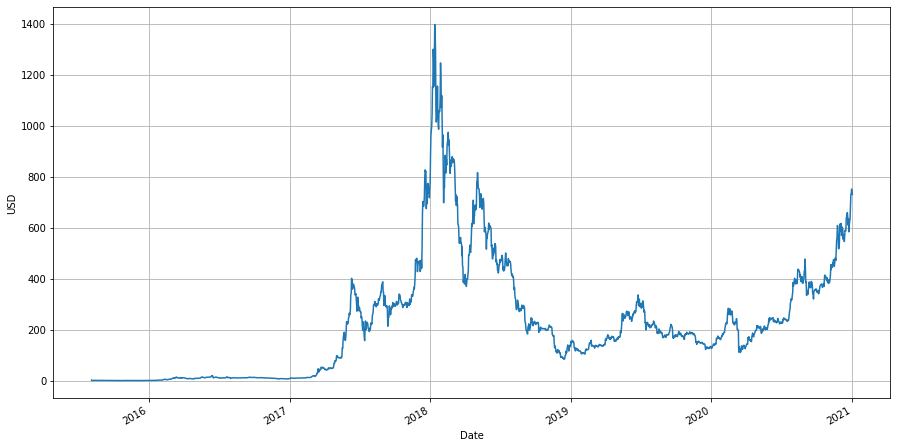

In [ ]:
# Plot graph of price from 2017 onwards
df['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("USD")
plt.show()

In [ ]:
# Create 200 days simple moving average column
df['20_SMA'] = df['Close Price'].rolling(window = 20, min_periods = 1).mean()
# Create 50 days simple moving average column
df['50_SMA'] = df['Close Price'].rolling(window = 50, min_periods = 1).mean()
# Display first few rows
df.head()

,Close Price,20_SMA,50_SMA
Date,,,
2015-08-06,2.772120,2.772120,2.772120
2015-08-07,0.753325,1.762722,1.762722
2015-08-08,0.701897,1.409114,1.409114
2015-08-09,0.708448,1.233948,1.233948
2015-08-10,1.067860,1.200730,1.200730


In [ ]:
# When the short term SMA exceeds the long term SMA (known as a Golden Cross), it signals buying pressure from the market and we should look to buy
# When the long term SMA exceeds the short term SMA (known as a Death Cross), it signals selling pressure from the market and we should look to sell
# We add indicators into the data to show when these indicators occurs

df['Signal'] = 0.0
df['Signal'] = np.where(df['50_SMA'] < df['20_SMA'], 1.0, 0.0)

df['Position'] = df['Signal'].diff()
# display first few rows
df.head(250)

,Close Price,20_SMA,50_SMA,Signal,Position
Date,,,,,
2015-08-06,2.772120,2.772120,2.772120,0.0,NaN
2015-08-07,0.753325,1.762722,1.762722,0.0,0.0
2015-08-08,0.701897,1.409114,1.409114,0.0,0.0
2015-08-09,0.708448,1.233948,1.233948,0.0,0.0
2015-08-10,1.067860,1.200730,1.200730,0.0,0.0
...,...,...,...,...,...
2016-04-07,9.719590,11.143805,9.915987,1.0,0.0
2016-04-08,9.150620,11.085346,10.004242,1.0,0.0
2016-04-09,8.936340,10.938958,10.096142,1.0,0.0


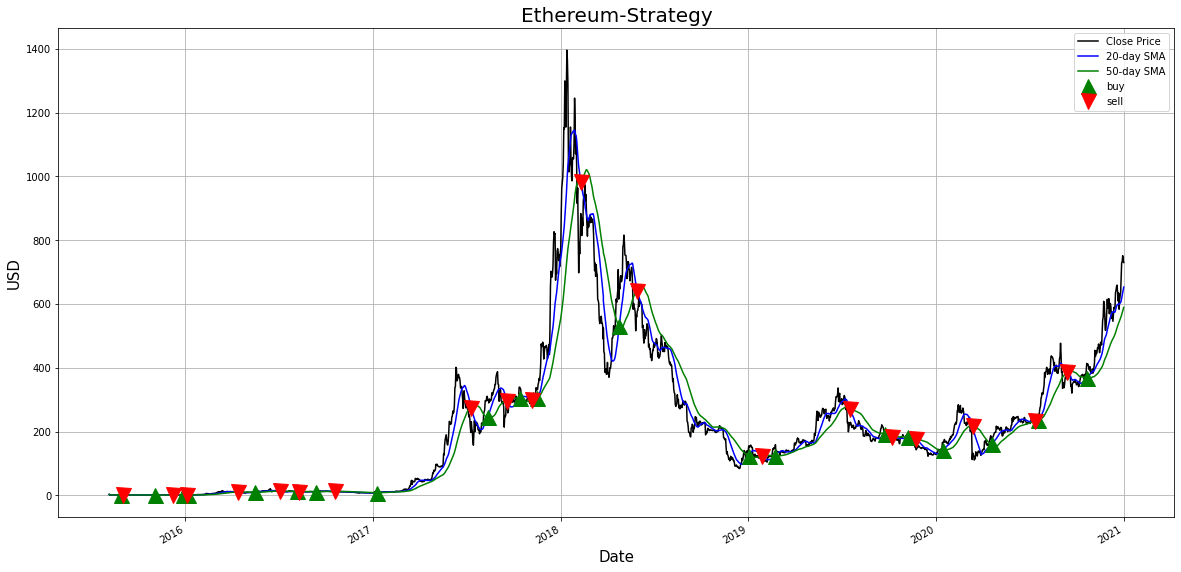

In [ ]:
#Signals graph
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close Price'].plot(color = 'k', label= 'Close Price') 
df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
df['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['20_SMA'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['20_SMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Ethereum-Strategy', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

Moving averages work quite well in strong trending conditions but poorly in choppy or ranging conditions. As we can see in the indicators above when markets move sideways, some of the signals can do with some additional refinement. Adjusting the time frame can remedy this problem temporarily, although at some point, these issues are likely to occur regardless of the time frame chosen for the moving average(s). Hence we will make use of other complimentary indicators to make confirmations of trades we want to do.

* Crossover is considered more significant when accompanied by high trading volume (OBV indicator)

#### MACD

#### RSI

#### OBV

### Pulling Live Prices

### Conclusion for momentum strategy for ETH/USD

## ZIL USD

In [ ]:
# Rinse and repeat from Ethereum analysis

# Overall Returns

## Risk Management

We should aim for a risk:reward ratio of 1:3 and not have more than 1% of capital risked per trade. 
* Meaning we aim to earn 3 dollars for every 1 dollar risked and aim to take profit at this amount
* If we start with 100 dollars, every trade should lose only 1 dollar maximum before we trigger the stop loss

### Stop Loss

### Take Profit

## Overall Calculation after Risk Management

In [ ]:
# After deciding on strategy we come up with overall calculations for historical returns